In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

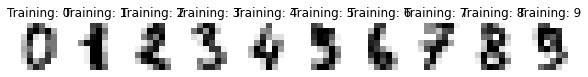

In [5]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [15]:
len(digits.images)

1797

In [18]:
len(digits.images[0])

8

In [19]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [20]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [25]:
y_pred

array([8, 3, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       9, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 9, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 3, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 9, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 8, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 3, 5, 4, 3, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 8, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

In [26]:
confusion_matrix(y_test, y_pred)

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  0, 83,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 84,  0,  2,  0,  1,  2,  2],
       [ 0,  0,  0,  0, 87,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0, 89,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 91,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88,  1,  0],
       [ 0,  4,  0,  2,  0,  0,  0,  0, 81,  1],
       [ 0,  0,  0,  4,  0,  2,  0,  0,  0, 86]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.96      0.97      0.96        91
           2       0.99      0.97      0.98        86
           3       0.91      0.92      0.92        91
           4       0.99      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.99      0.99      0.99        89
           8       0.94      0.92      0.93        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899

